In [1]:
#Kittipong Wangnok
#School of Physics, Institute of Science, Suranaree University of Technology
#Import module
import sys
import os
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

import time

In [2]:
t0 = time.time()

In [3]:
ls

20220716_fitting_parameters.xlsx
2022_July_week2_OC_New_ephemeris.pdf
Beuermann2011_generated_model.pdf
Kaggle.ipynb
Kaggle_linear.ipynb
OC_LTT_dpleo_brute.ipynb
OC_LTT_dpleo_brute.pdf
OC_LTT_dpleo_brute.py
OC_LTT_dpleo_brute_model_Thiswork.pdf
OC_LTT_dpleo_brute_multicore.py
decaying_sine_wave_brute.ipynb
generate_model_brute.ipynb
interporate_lnLTT_fit_Beuermann.out
oc_dpleo_Beuermann_Schwope_Kittipong.inp
oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt


In [4]:
#New ephemeris
T0_bjd = 48773.21447208912
T0_bjd_err = 1.5208837115006639e-05
P0_day = 0.062362846562657996
P0_day_err = 1.4497390367476744e-10

In [5]:
#Please change the input file
DP_Leo_bjd = open("oc_dpleo_Beuermann_Schwope_Kittipong.inp",'r').readlines()
N_dpleo_bjd = len(DP_Leo_bjd)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("oc_dpleo_Beuermann_Schwope_Kittipong.inp"):
#for line in open("T_mid_Beuermann_Schwope.in"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split("\t")[0]))
        T_obs.append(float(li.split("\t")[1]))
        T_obs_err.append(float(li.split("\t")[2]))

In [6]:
BJD_time_a = [i for i in range(N_dpleo_bjd)]
Delta_aT = [i for i in range(N_dpleo_bjd)]
Delta_aT_err = [i for i in range(N_dpleo_bjd)]
E_af = [i for i in range(N_dpleo_bjd)] #float number
E_ak = [i for i in range(N_dpleo_bjd)] #integer number
E_aj = [i for i in range(N_dpleo_bjd)] #integer number
P_aE = [i for i in range(N_dpleo_bjd)]
P_err_aE = [i for i in range(N_dpleo_bjd)]
T_aC_linear = [i for i in range(N_dpleo_bjd)]
T_aO_linear = [i for i in range(N_dpleo_bjd)]
P_aver_a = [i for i in range(N_dpleo_bjd)]
P_aver_std_a = [i for i in range(N_dpleo_bjd)]

In [7]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_bjd):
    BJD_time = np.array(T_obs)
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    
rerults = OC_cal
f = open('oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt', 'w')
#for upper_result in upper_result:
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	44214.553250	-73099	44214.553250	44214.552751	43.095854	13.750076
1	44214.615620	-73098	44214.615620	44214.615114	43.713911	13.750075
2	44214.677980	-73097	44214.677980	44214.677477	43.467969	13.750074
3	44968.023090	-61017	44968.023090	44968.020663	209.660364	98.653717
4	44968.957120	-61002	44968.957120	44968.956106	87.603218	98.653716
5	44969.019620	-61001	44969.019620	44969.018469	99.453275	98.653715
6	44978.997550	-60841	44978.997550	44978.996524	88.614393	98.653700
7	44993.900780	-60602	44993.900780	44993.901245	-40.149987	58.652469
8	44993.963280	-60601	44993.963280	44993.963608	-28.299929	58.652469
9	44994.026420	-60600	44994.026420	44994.025970	38.846127	58.652468
10	45020.905130	-60169	45020.905130	45020.904357	66.764688	18.659583
11	45021.902920	-60153	45021.902920	45021.902163	65.421600	18.659575
12	45024.833860	-60106	45024.833860	45024.833217	55.590278	58.652389
13	45731.966400	-48767	45731.966400	45731.

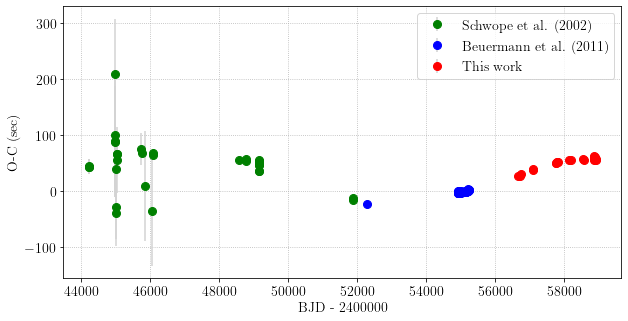

In [8]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
BJD_time = Data[:,0]
Cycle = Data[:,1]
T_O = Data[:,2]
T_C = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
plt.errorbar(BJD_time[0:32], OC_s[0:32], yerr=OC_s_err[0:32], fmt='o', markersize=8, color='green', ecolor='lightgray',label='Schwope et al. (2002)')
plt.errorbar(BJD_time[33:87], OC_s[33:87], yerr=OC_s_err[33:87], fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Beuermann et al. (2011)')
plt.errorbar(BJD_time[88:112], OC_s[88:112], yerr=OC_s_err[88:112], fmt='o', markersize=8, color='red', ecolor='lightgray',label='This work')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
plt.xlabel('BJD - 2400000')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.legend(loc="best")
plt.savefig("2022_July_week2_OC_New_ephemeris.pdf", dpi=1200)
plt.show()

In [9]:
x = BJD_time
Epoch = (x - T0_bjd)/P0_day 
y = OC_s
dy = OC_s_err
len_x = len(x)

In [10]:
m = 0
c = 0
K = 33.7       #m/s
P = 10220       #days
e = 0.39               #No-unit
w = -1.36           #rad
tau = 53025   #days

In [11]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [12]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnLTT_fit(t,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    return K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [13]:
import scipy.optimize as optimization  
guess = (K,P,e,w,tau)
params, params_covariance = optimization.curve_fit(lnLTT_fit, x, y,sigma=dy, absolute_sigma=True,p0=guess,maxfev = 10000)


K = params[0]
P = params[1]
e = params[2]
w = params[3]
tau = params[4]


dK = params_covariance[0,0]
dP = params_covariance[1,1]
de = params_covariance[2,2]
dw = params_covariance[3,3]
dtau = params_covariance[4,4]

In [14]:
oc_lnLTT_fit = lnLTT_fit(x,*params)

#print("The fitting parameters:")
#print("dP =", m, "+/-", dm**0.5, "[s]")
#print("dT0 =", c, "+/-", dc**0.5, "[s]")
#print("T0(BJD) =", T, "+/-", dT, "[days]")
#print("P_bin =", Period, "+/-", dPeriod, "[days]")
#print("K =", K, "+/-", dK**0.5, "[s]")
#print("P_d =", P, "+/-", dP**0.5, "[days]")
#print("P_yr =", P/365.25, "+/-", (dP**0.5)/365.25, "[years]")
#print("e =", e, "+/-", de**0.5, "[-]")
#print("w =", w, "+/-", dw**0.5, "[rad]")
#print("w_deg =", w*(180/np.pi), "+/-", dw**0.5*(180/np.pi), "[deg]")
#print("tau =", tau, "+/-", dtau**0.5, "[days]")

print("The fitting parameters:")
#print('T0 = '+str('%0.5f' %(T0)),'+/-', str('%0.5f' %(dT0**0.5)), "[days]")
#print('P_bin = '+str('%0.10f' %(P_orb)),'+/-', str('%0.10f' %(dP_orb**0.5)), "[days]")
print('K = '+str('%0.2f' %(K)),'+/-', str('%0.2f' %(dK**0.5)), "[s]")
print('P_d = '+str('%0.2f' %(P)),'+/-', str('%0.2f' %(dP**0.5)), "[days]")
print('P_yr = '+str('%0.2f' %(P/365.25)),'+/-', str('%0.2f' %((dP**0.5)/365.25)), "[years]")
print('e = '+str('%0.2f' %(e)),'+/-', str('%0.2f' %(de**0.5)), "[-]")
print('w = '+str('%0.2f' %(w)),'+/-', str('%0.2f' %(dw**0.5)), "[rad]")
print('w_deg = '+str('%0.2f' %(w*(180/np.pi))),'+/-', str('%0.2f' %(dw**0.5*(180/np.pi))), "[deg]")
print('tau = '+str('%0.0f' %(tau)),'+/-', str('%0.0f' %(dtau**0.5)), "[days]")

The fitting parameters:
K = 49.21 +/- 0.50 [s]
P_d = 14064.51 +/- 228.78 [days]
P_yr = 38.51 +/- 0.63 [years]
e = 0.39 +/- 0.01 [-]
w = -1.92 +/- 0.04 [rad]
w_deg = -109.98 +/- 2.31 [deg]
tau = 52582 +/- 66 [days]


In [15]:
import copy

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Minimizer, Parameters, fit_report

In [16]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnLTT_fit(params,t,y):
    K = params['K']
    P = params['P']
    e = params['e']
    w = params['w']
    tau = params['tau']
    f = TAno(P,tau,e,t)
    model = K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    return model - y

In [17]:
# create a set of Parameters
params = Parameters()
params.add('K', value=33.7)
params.add('P', value=10220, min=10000)
params.add('e', value=0.39)
params.add('w', value=-1.36, min=-2)
params.add('tau', value=53025)


#params.add('K', value=45.8, min=5, max=500.0)
#params.add('P', value=13635, min=1000, max=15000)
#params.add('e', value=0.36, min=0, max=1)
#params.add('w', value=-1.76, min=-4, max=2)
#params.add('w', value=-1.76)
#params.add('tau', value=52880, min=45000, max=60000)

In [18]:
params['K'].set(brute_step=20)
params['P'].set(brute_step=5000)
params['e'].set(brute_step=0.05)
params['w'].set(brute_step=0.5)
params['tau'].set(brute_step=1000)

In [19]:
params.pretty_print()

Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
K        33.7     -inf      inf     None     True     None       20
P    1.022e+04    1e+04      inf     None     True     None     5000
e        0.39     -inf      inf     None     True     None     0.05
tau  5.302e+04     -inf      inf     None     True     None     1000
w       -1.36       -2      inf     None     True     None      0.5


In [ ]:
fitter = Minimizer(lnLTT_fit, params, fcn_args=(x, y))
result_brute = fitter.minimize(method='brute', Ns=100, keep=50)

In [ ]:
par_name = 'K'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

In [ ]:
par_name = 'P'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

In [ ]:
par_name = 'e'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

In [ ]:
par_name = 'tau'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

In [ ]:
par_name = 'w'
indx_shift = result_brute.var_names.index(par_name)
grid_shift = np.unique(result_brute.brute_grid[indx_shift].ravel())
print(f"parameter = {par_name}\nnumber of steps = {len(grid_shift)}\ngrid = {grid_shift}")

In [ ]:
print(fit_report(result_brute))

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, y + lnLTT_fit(result_brute.params, x, y), '--')
plt.show()

In [ ]:
result_brute.show_candidates(1)

In [ ]:
result_brute.show_candidates(2)

In [ ]:
best_result = copy.deepcopy(result_brute)

for candidate in result_brute.candidates:
    trial = fitter.minimize(method='leastsq', params=candidate.params)
    if trial.chisqr < best_result.chisqr:
        best_result = trial

In [ ]:
print(fit_report(best_result))

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, y + lnLTT_fit(result_brute.params, x, y), '-',label='brute')
plt.plot(x, y + lnLTT_fit(best_result.params, x, y), '--',label='brute followed by leastsq')
plt.legend()
plt.show()

In [ ]:
def plot_results_brute(result, best_vals=True, varlabels=None,
                       output=None):
    """Visualize the result of the brute force grid search.

    The output file will display the chi-square value per parameter and contour
    plots for all combination of two parameters.

    Inspired by the `corner` package (https://github.com/dfm/corner.py).

    Parameters
    ----------
    result : :class:`~lmfit.minimizer.MinimizerResult`
        Contains the results from the :meth:`brute` method.

    best_vals : bool, optional
        Whether to show the best values from the grid search (default is True).

    varlabels : list, optional
        If None (default), use `result.var_names` as axis labels, otherwise
        use the names specified in `varlabels`.

    output : str, optional
        Name of the output PDF file (default is 'None')
    """
    npars = len(result.var_names)
    fig,axes=plt.subplots(npars,npars,figsize=(12,12))
 #   _fig, axes = plt.subplots(npars, npars)

    if not varlabels:
        varlabels = result.var_names
    if best_vals and isinstance(best_vals, bool):
        best_vals = result.params

    for i, par1 in enumerate(result.var_names):
        for j, par2 in enumerate(result.var_names):

            # parameter vs chi2 in case of only one parameter
            if npars == 1:
                axes.plot(result.brute_grid, result.brute_Jout, 'o', ms=3)
                axes.set_ylabel(r'$\chi^{2}$')
                axes.set_xlabel(varlabels[i])
                if best_vals:
                    axes.axvline(best_vals[par1].value, ls='dashed', color='r')

            # parameter vs chi2 profile on top
            elif i == j and j < npars-1:
                if i == 0:
                    axes[0, 0].axis('off')
                ax = axes[i, j+1]
                red_axis = tuple(a for a in range(npars) if a != i)
                ax.plot(np.unique(result.brute_grid[i]),
                        np.minimum.reduce(result.brute_Jout, axis=red_axis),
                        'o', ms=3)
                ax.set_ylabel(r'$\chi^{2}$')
                ax.yaxis.set_label_position("right")
                ax.yaxis.set_ticks_position('right')
                ax.set_xticks([])
                if best_vals:
                    ax.axvline(best_vals[par1].value, ls='dashed', color='r')

            # parameter vs chi2 profile on the left
            elif j == 0 and i > 0:
                ax = axes[i, j]
                red_axis = tuple(a for a in range(npars) if a != i)
                ax.plot(np.minimum.reduce(result.brute_Jout, axis=red_axis),
                        np.unique(result.brute_grid[i]), 'o', ms=3)
                ax.invert_xaxis()
                ax.set_ylabel(varlabels[i])
                if i != npars-1:
                    ax.set_xticks([])
                else:
                    ax.set_xlabel(r'$\chi^{2}$')
                if best_vals:
                    ax.axhline(best_vals[par1].value, ls='dashed', color='r')

            # contour plots for all combinations of two parameters
            elif j > i:
                ax = axes[j, i+1]
                red_axis = tuple(a for a in range(npars) if a not in (i, j))
                X, Y = np.meshgrid(np.unique(result.brute_grid[i]),
                                   np.unique(result.brute_grid[j]))
                lvls1 = np.linspace(result.brute_Jout.min(),
                                    np.median(result.brute_Jout)/2.0, 7, dtype='int')
                lvls2 = np.linspace(np.median(result.brute_Jout)/2.0,
                                    np.median(result.brute_Jout), 3, dtype='int')
                lvls = np.unique(np.concatenate((lvls1, lvls2)))
                ax.contourf(X.T, Y.T, np.minimum.reduce(result.brute_Jout, axis=red_axis),
                            lvls, norm=LogNorm())
                ax.set_yticks([])
                if best_vals:
                    ax.axvline(best_vals[par1].value, ls='dashed', color='r')
                    ax.axhline(best_vals[par2].value, ls='dashed', color='r')
                    ax.plot(best_vals[par1].value, best_vals[par2].value, 'rs', ms=3)
                if j != npars-1:
                    ax.set_xticks([])
                else:
                    ax.set_xlabel(varlabels[i])
                if j - i >= 2:
                    axes[i, j].axis('off')

    if output is not None:
        plt.savefig(output)

In [ ]:
plot_results_brute(result_brute, best_vals=True, varlabels=None)
plt.savefig("OC_LTT_dpleo_brute.pdf", dpi=1200)

In [ ]:
t = time.time()

In [ ]:
print(t-t0)
print((t-t0)/60)

#### generate model using the fitting parameters

In [ ]:
#The fitting parameters
K = 45.8080314
P = 13635.3816
e = 0.36984397
w = -1.77001324
tau = 52880.6776

In [ ]:
from scipy.optimize import fsolve

def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

def lnLTT_fit(t,K,P,e,w,tau):
    f = TAno(P,tau,e,t)
    Epoch = (t - T0_bjd)/P0_day
    return K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))

In [ ]:
N = 700
x_range = [i for i in range(N)]
x_range_a = [i for i in range(N)]
y_range = [i for i in range(len(x_range))]
step=1*100
#step

interporate = []
for i in range(300, N):
    x_range[i] = i*step
    Epoch = np.round((x_range[i] - T0_bjd)/P0_day)
    y_range[i] = lnLTT_fit(x_range[i],K,P,e,w,tau)
#    print(x_range[i], y_range[i], Epoch)
    interporate.append('%0.0f %0.2f %0.10f %0.10f %0.0f %0.5f' %(i, x_range[i], T0_bjd, P0_day, Epoch, y_range[i]))
    
data_out = interporate
f = open("interporate_lnLTT_fit_Beuermann.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

InputFile_out = "interporate_lnLTT_fit_Beuermann.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_range_lnLTT_Beuermann = Data_out[:,1]
Epoch_range_lnLTT_Beuermann = Data_out[:,4]
y_range_lnLTT_Beuermann = Data_out[:,5]

In [ ]:
#Plot O-C vs BJD
InputFileInput  = 'oc_linear_dpleo_Beuermann_Schwope_Kittipong_ephemeris_determination.txt'
Data   = np.genfromtxt(InputFileInput)
BJD_time = Data[:,0]
Cycle = Data[:,1]
T_O = Data[:,2]
T_C = Data[:,3]
OC_s = Data[:,4]
OC_s_err = Data[:,5]

##Plotgraph
fig=plt.figure(figsize=(10, 5))
#plt.errorbar(Cycle, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
plt.errorbar(Cycle[0:32], OC_s[0:32], yerr=OC_s_err[0:32], fmt='o', markersize=8, color='red', ecolor='lightgray',label='Schwope et al. (2002)')
plt.errorbar(Cycle[33:87], OC_s[33:87], yerr=OC_s_err[33:87], fmt='o', markersize=8, color='green', ecolor='lightgray',label='Beuermann et al. (2011)')
plt.errorbar(Cycle[88:112], OC_s[88:112], yerr=OC_s_err[88:112], fmt='o', markersize=8, color='blue', ecolor='lightgray',label='This work')
#plt.plot(Epoch_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '--', color='green',label='lnLTT\_fit')
plt.plot(Epoch_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '-', color='black',label='Model of This work')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
#plt.xlabel('BJD - 2400000')
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.legend(loc="best")
#plt.savefig("Beuermann2011_generated_model.pdf", dpi=1200)
plt.show()

In [ ]:
##Plotgraph
fig=plt.figure(figsize=(10, 5))
#plt.errorbar(Cycle, OC_s, yerr=OC_s_err, fmt='o', markersize=8, color='limegreen', ecolor='lightgray')
plt.errorbar(BJD_time[0:32], OC_s[0:32], yerr=OC_s_err[0:32], fmt='o', markersize=8, color='red', ecolor='lightgray',label='Schwope et al. (2002)')
plt.errorbar(BJD_time[33:87], OC_s[33:87], yerr=OC_s_err[33:87], fmt='o', markersize=8, color='green', ecolor='lightgray',label='Beuermann et al. (2011)')
plt.errorbar(BJD_time[88:112], OC_s[88:112], yerr=OC_s_err[88:112], fmt='o', markersize=8, color='blue', ecolor='lightgray',label='This work')
#plt.plot(Epoch_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '--', color='green',label='lnLTT\_fit')
plt.plot(x_range_lnLTT_Beuermann, y_range_lnLTT_Beuermann, '-', color='black',label='Model of This work')
#plt.xlim(4850,5450)
#plt.ylim(-50,60)
plt.xlabel('BJD - 2400000')
#plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.legend(loc="best")
plt.savefig("OC_LTT_dpleo_brute_model_Thiswork.pdf", dpi=1200)
plt.show()